In [1]:
import numpy as np
import scipy as sp
from scipy import sparse as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

from src.helpers import get_FD_matrix

In [2]:
# Set the desired theme
sns.set_theme(font_scale=1.2)

# Read/build the matrices

In [3]:
orani678 = sp.io.mmread('data/orani678.mtx').tocsc()
bcspwr10 = sp.io.mmread('data/bcspwr10.mtx').tocsc()
gr_30_30 = sps.csc_matrix(sp.io.mmread('data/gr_30_30.mtx').toarray().astype(np.float64))  # NOTE: Stored as int
helm2d03 = sp.io.mmread('data/helm2d03.mtx').tocsc()

In [4]:
fd_1d = get_FD_matrix(n=4096, d=1)
fd_2d = get_FD_matrix(n=64, d=2)
fd_3d = get_FD_matrix(n=16, d=3)

# $\varphi$-function approximation

## `fd_1d`

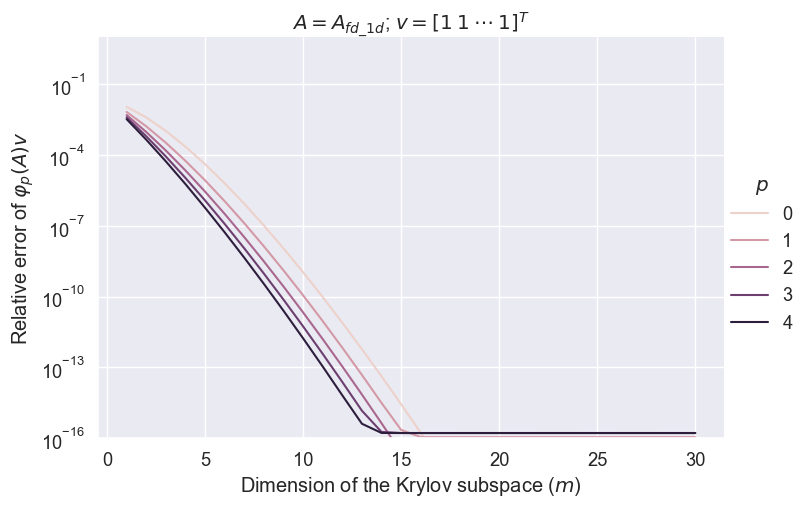

In [55]:
df_fd_1d = study_approximation_convergence(
    A=fd_1d,
    v=np.ones(shape=(fd_1d.shape[0],), dtype=fd_1d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{fd\_1d}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_fd_1d['$A =$'] = '$fd\_1d$'

## `fd_2d`

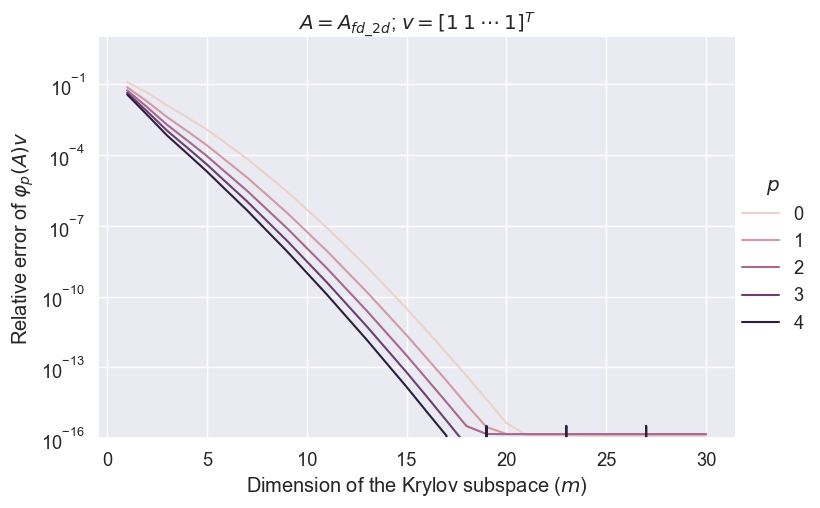

In [33]:
df_fd_2d = study_approximation_convergence(
    A=fd_2d,
    v=np.ones(shape=(fd_2d.shape[0],), dtype=fd_2d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{fd\_2d}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_fd_2d['$A =$'] = '$fd\_2d$'

## `fd_3d`

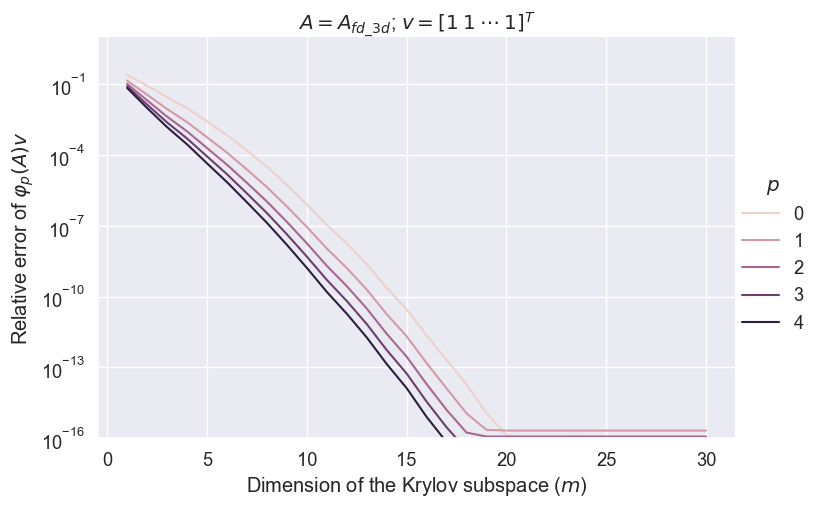

In [57]:
df_fd_3d = study_approximation_convergence(
    A=fd_3d,
    v=np.ones(shape=(fd_3d.shape[0],), dtype=fd_3d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{fd\_3d}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_fd_3d['$A =$'] = '$fd\_3d$'

## `fd_1d_100`

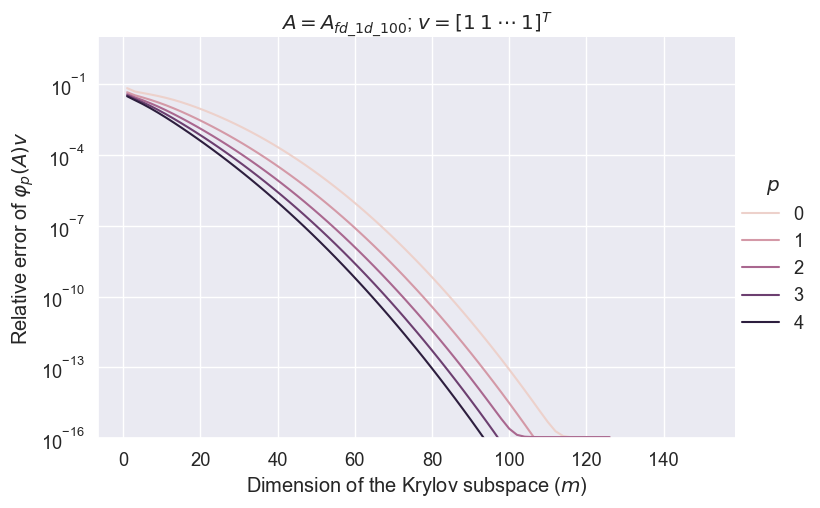

In [40]:
df_fd_1d_100 = study_approximation_convergence(
    A=(100 * fd_1d),
    v=np.ones(shape=(fd_1d.shape[0],), dtype=fd_1d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 151, 75)],
    title='$A=A_{fd\_1d\_100}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_fd_1d_100['$A =$'] = '$fd\_1d\_100$'

## `fd_2d_100`

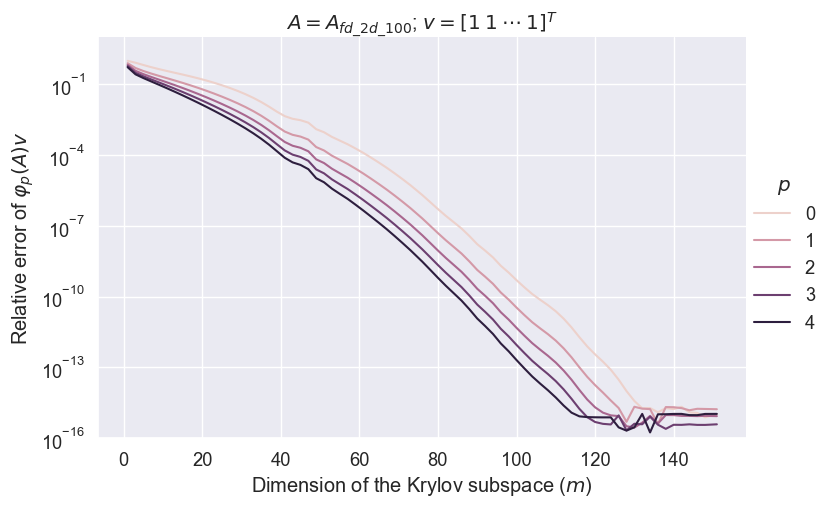

In [39]:
df_fd_2d_100 = study_approximation_convergence(
    A=(100 * fd_2d),
    v=np.ones(shape=(fd_2d.shape[0],), dtype=fd_2d.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 151, 75)],
    title='$A=A_{fd\_2d\_100}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_fd_2d_100['$A =$'] = '$fd\_2d\_100$'

## [`orani678`](https://suitesparse-collection-website.herokuapp.com/?filterrific%5Bsearch_query%5D=orani678&filterrific%5Bsorted_by%5D=name_asc) (unsymmetric)

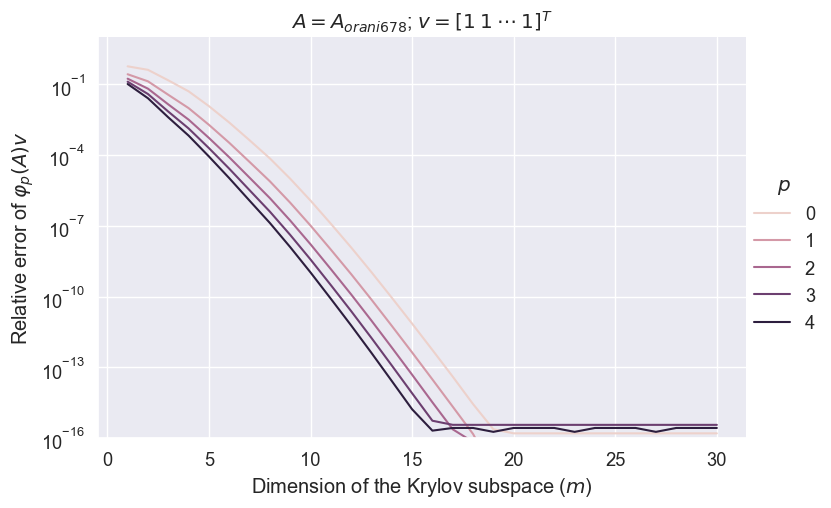

In [35]:
df_orani678 = study_approximation_convergence(
    A=orani678,
    v=np.ones(shape=(orani678.shape[0],), dtype=orani678.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{orani678}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_orani678['$A =$'] = '$orani678$'

## [`bcspwr10`](https://suitesparse-collection-website.herokuapp.com/?filterrific%5Bsearch_query%5D=bcspwr10&filterrific%5Bsorted_by%5D=name_asc) (Hermitian, SINGULAR)

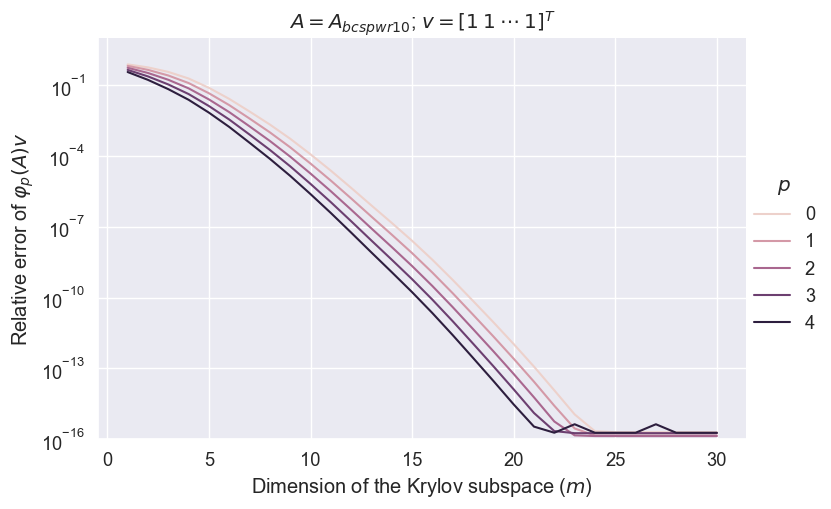

In [36]:
df_bcspwr10 = study_approximation_convergence(
    A=bcspwr10,
    v=np.ones(shape=(bcspwr10.shape[0],), dtype=bcspwr10.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{bcspwr10}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_bcspwr10['$A =$'] = '$bcspwr10$'

## [`gr_30_30`](https://suitesparse-collection-website.herokuapp.com/HB/gr_30_30) (symmetric)

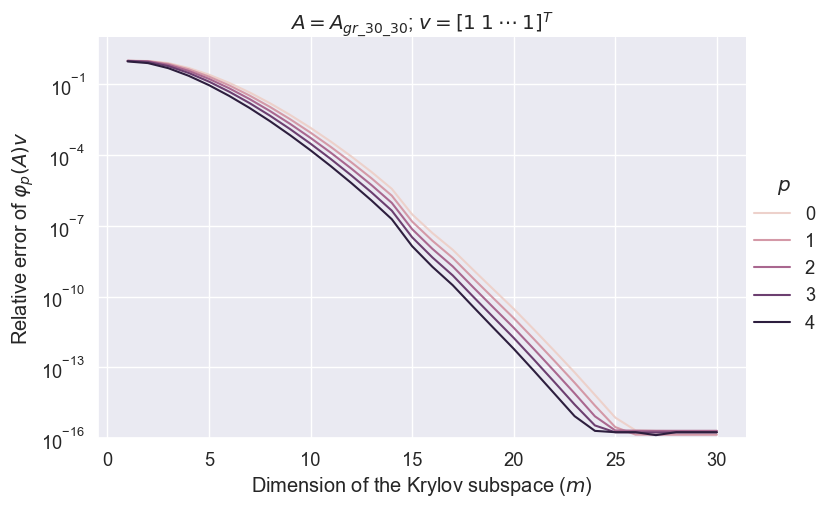

In [58]:
df_gr_30_30 = study_approximation_convergence(
    A=gr_30_30,
    v=np.ones(shape=(gr_30_30.shape[0],), dtype=gr_30_30.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{gr\_30\_30}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_gr_30_30['$A =$'] = '$gr\_30\_30$'

## [`helm2d03`](https://suitesparse-collection-website.herokuapp.com/GHS_indef/helm2d03) (symmetric)

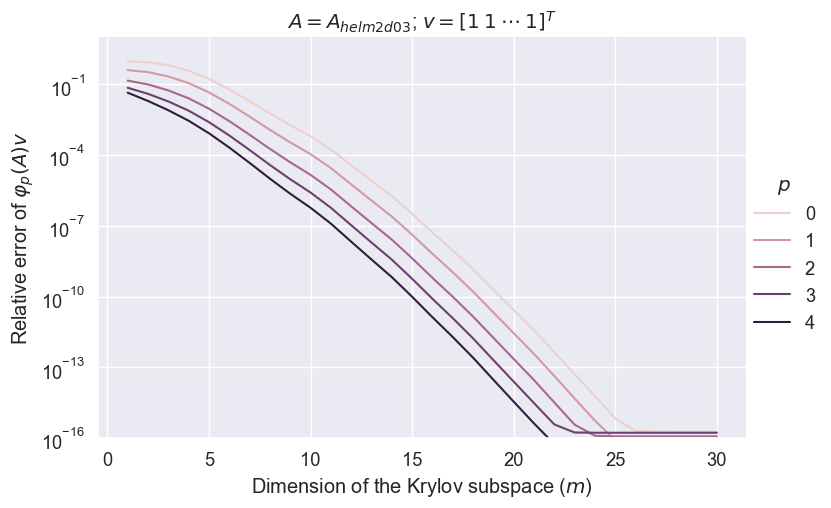

In [59]:
df_helm2d03 = study_approximation_convergence(
    A=helm2d03,
    v=np.ones(shape=(helm2d03.shape[0],), dtype=helm2d03.dtype),
    p_max=5,
    ms=[int(m) for m in np.linspace(1, 30, 30)],
    title='$A=A_{helm2d03}$; $v=[1\:1\:\cdots\:1]^T$',
    m_exact=256,
)
df_helm2d03['$A =$'] = '$helm2d03$'

# Comparing convergence of matrices

## Compare matrices with different spectrums

In [42]:
def compare_convergences(dfs: list[pd.DataFrame], ps: list[int], title: str = None):
    g = sns.FacetGrid(
        data=pd.concat([pd.concat([df[df['$p$'] == p] for p in ps]) for df in dfs]),
        col='$p$',
        hue='$A =$',
        col_wrap=2,
        height=5,
        aspect=1.5,
    )
    g.map(sns.lineplot, '$m$', 'Relative error')
    g.add_legend()
    g.set(yscale='log', ylim=[1e-16, 1e+01])
    if title:
        plt.title(title)
    return g

In [50]:
def get_errors_taylor(ps, n=2000, alpha=8):
    """
    Assumes the vector v is ones of size n.
    """

    ms = np.linspace(1, 30, 30, dtype=np.int64)
    dfs = []
    for p in ps:
        bound = (2 * np.sqrt(n) * (alpha ** ms)
                / np.array([np.math.factorial(m + p) for m in ms], dtype=np.float64))

        dfs.append(
            pd.DataFrame({
                '$p$': [p] * len(ms),
                '$m$': ms,
                '$A =$': 'Estimate #1',
                'Relative error': bound,
            })
        )

    return pd.concat(dfs)

In [51]:
def get_errors_chebyshev(ps, n=2000, alpha=8):
    """
    Assumes the vector v is ones of size n.
    estimates for p!=1 are not valid.
    """
    ms = np.linspace(1, 30, 30, dtype=np.int64)
    dfs = []
    for p in ps:
        bound_i = (
            np.sqrt(n) * (5 * (alpha ** 2)) / (ms ** 3)
            * np.exp(- 4 * (ms ** 2) / (5 * alpha))
        )
        bound = (
            np.sqrt(n) * 64 / (12 * ms - 5 * alpha)
            * ((np.e * alpha / (4 * ms + 2 * alpha)) ** ms)
        )
        bound[np.where(ms < (alpha / 2))] = bound_i[np.where(ms < (alpha / 2))]
        # bound[np.where(ms < np.sqrt(alpha))] = np.nan

        dfs.append(
            pd.DataFrame({
                '$p$': [p] * len(ms),
                '$m$': ms,
                '$A =$': 'Estimate #2',
                'Relative error': bound,
            })
        )

    return pd.concat(dfs)

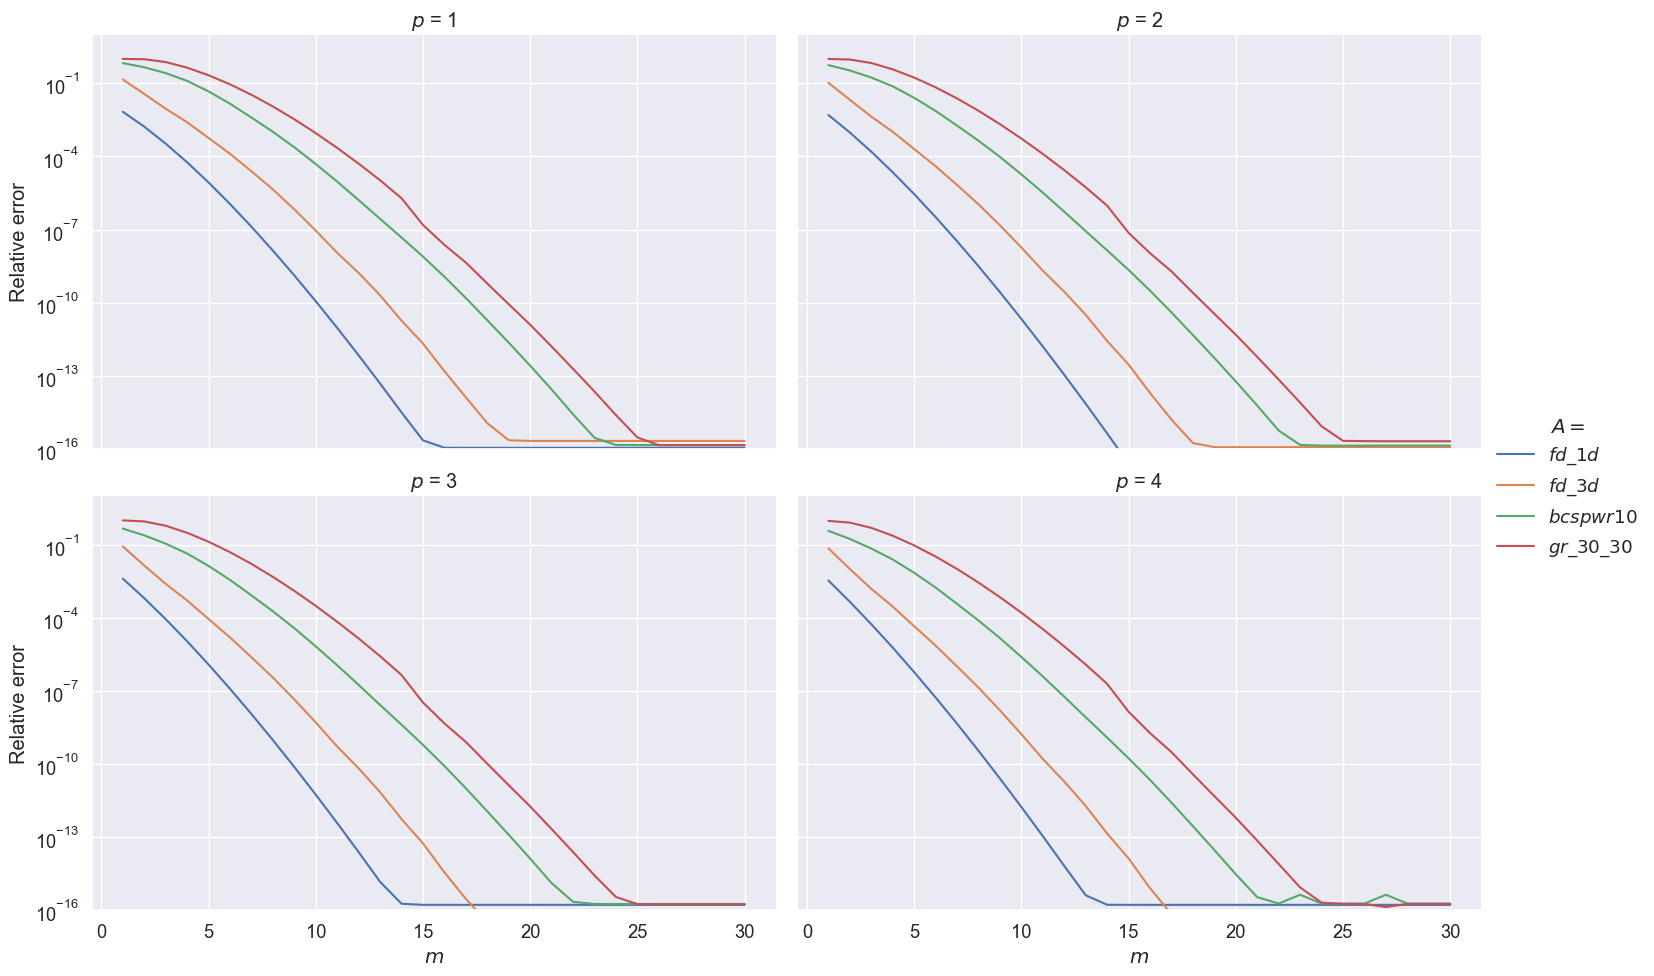

In [29]:
ps=[1, 2, 3, 4]
g = compare_convergences(
    dfs=[
        df_fd_1d,
        df_fd_3d,
        df_bcspwr10,
        df_gr_30_30,
    ],
    ps=ps,
)

## Compare with error estimations

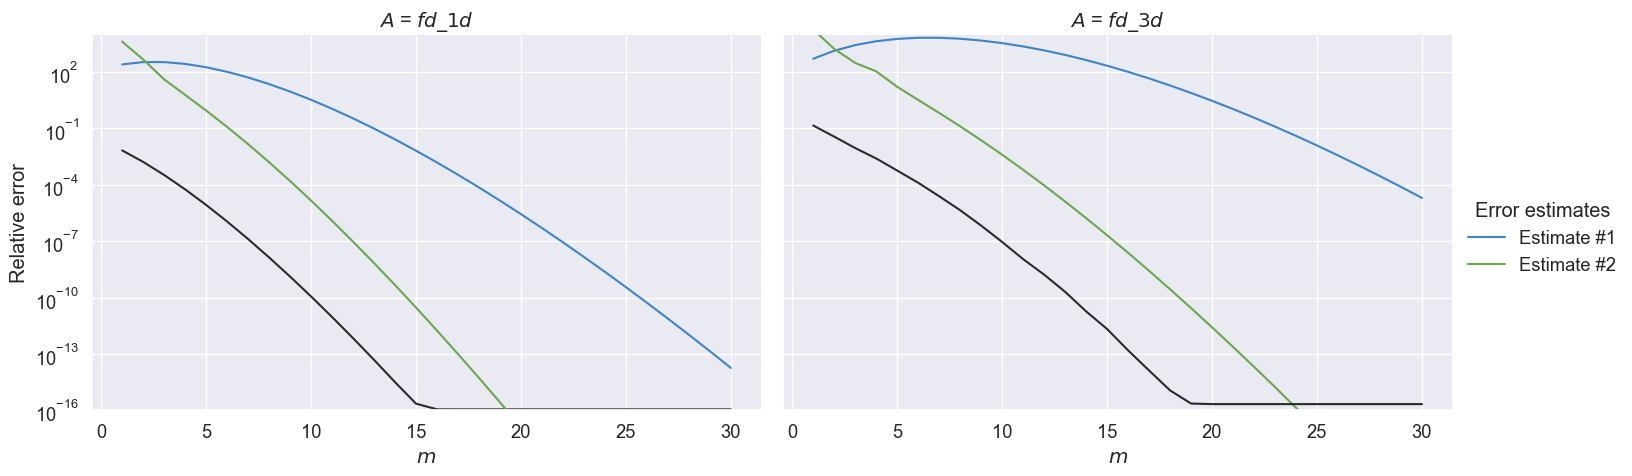

In [25]:
n = fd_1d.shape[0]
ps = [1]
df1 = pd.concat([
    df_fd_1d[df_fd_1d['$p$'] == 1].copy(),
    get_errors_taylor(ps=ps, n=n, alpha=4),
    get_errors_chebyshev(ps=ps, n=n, alpha=4)
])
df2 = pd.concat([
    df_fd_3d[df_fd_3d['$p$'] == 1].copy(),
    get_errors_taylor(ps=ps, n=n, alpha=8.01),
    get_errors_chebyshev(ps=ps, n=n, alpha=8)
])
df1['$A$'] = '$fd\_1d$'
df2['$A$'] = '$fd\_3d$'
g = sns.FacetGrid(
    data=pd.concat([df1, df2]),
    col='$A$',
    hue='$A =$',
    col_wrap=2,
    height=5,
    aspect=1.5,
    palette=['#2b2b2b', '#3d85c6', '#6aa84f'],
)
g.map(sns.lineplot, '$m$', 'Relative error')
g.add_legend(
    label_order=['Estimate #1', 'Estimate #2'],
    title='Error estimates',
    loc='right',
)
g.set(yscale='log', ylim=[1e-16, 1e+04])